<a href="https://colab.research.google.com/github/MateusCDev/Projeto_LinearRegress/blob/master/Regress%C3%A3o_Linear_Predicao_da_Idade_dos_Passageiros_do_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear - Predição da Idade

### importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ler train.csv e test.csv

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Recursos/09 - Projeto - Regressao Linear - Predicao da Idade/titanic/train.csv')

In [4]:
test = pd.read_csv('/content/drive/MyDrive/Recursos/09 - Projeto - Regressao Linear - Predicao da Idade/titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [7]:
train.set_index('PassengerId', inplace=True)

In [8]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [9]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [10]:
test['Survived'] = np.nan

### Conferir shape novamente

In [11]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [12]:
data = pd.concat([train, test], sort=True)

In [14]:
data.shape

(1309, 11)

### Traduzir colunas

In [15]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [18]:
data.columns = ['Idade', 'Cabine', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
                'IrmaosConjuge', 'Sobreviveu', 'Bilhete']

### Traduzir Sexo

In [21]:
data.head()

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmaosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,homem,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,mulher,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,mulher,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,mulher,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,homem,0,0.0,373450


In [20]:
data['Sexo'] = data['Sexo'].map({'male':'homem', 'female': 'mulher'})

### Averiguar dados nulos

In [26]:
data.isnull().sum()

Idade            263
Embarque           2
Tarifa             1
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaosConjuge      0
Sobreviveu       418
Bilhete            0
dtype: int64

### Remover Cabine

In [25]:
data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [36]:
data.isnull().sum()

Idade            263
Embarque           0
Tarifa             1
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaosConjuge      0
Sobreviveu       418
Bilhete            0
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [28]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
moda = data['Embarque'].mode()[0]

In [35]:
data['Embarque'].fillna(moda, inplace=True) # prenchendo os dados nulos com a moda

### Checar dados nulos novamente

In [37]:
data.isnull().sum()

Idade            263
Embarque           0
Tarifa             1
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaosConjuge      0
Sobreviveu       418
Bilhete            0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [39]:
media = data['Tarifa'].mean()

In [40]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [41]:
data.isnull().sum()

Idade            263
Embarque           0
Tarifa             0
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaosConjuge      0
Sobreviveu       418
Bilhete            0
dtype: int64

### Verificar correlações

In [42]:
data.corr()

,Idade,Tarifa,PaisFilhos,Classe,IrmaosConjuge,Sobreviveu
Idade,1.000000,0.178229,-0.150917,-0.408106,-0.243699,-0.077221
Tarifa,0.178229,1.000000,0.221522,-0.558477,0.160224,0.257307
PaisFilhos,-0.150917,0.221522,1.000000,0.018322,0.373587,0.081629
Classe,-0.408106,-0.558477,0.018322,1.000000,0.060832,-0.338481
IrmaosConjuge,-0.243699,0.160224,0.373587,0.060832,1.000000,-0.035322
Sobreviveu,-0.077221,0.257307,0.081629,-0.338481,-0.035322,1.000000


### Visualizar correlações com "heatmap"

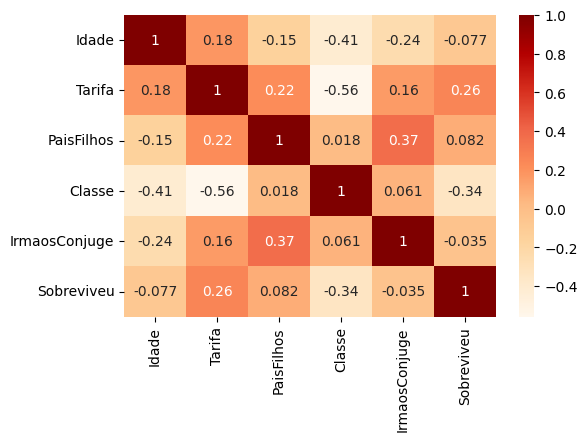

In [44]:
f, ax = plt.subplots(dpi =100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')
plt.show()

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [45]:
data.drop('Sobreviveu', axis = 1, inplace=True)
data.columns

Index(['Idade', 'Embarque', 'Tarifa', 'Nome', 'PaisFilhos', 'Classe', 'Sexo',
       'IrmaosConjuge', 'Bilhete'],
      dtype='object')

### Checar dados nulos

In [46]:
data.isnull().sum()

Idade            263
Embarque           0
Tarifa             0
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaosConjuge      0
Bilhete            0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [51]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [52]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [57]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [54]:
['Miss', 'Master', 'Mr', 'Mrs']

['Miss', 'Master', 'Mr', 'Mrs']

In [56]:
data['Titulo'] = data['Titulo'].apply(lambda x : 'Outros' if x not in ['Miss', 'Master', 'Mr', 'Mrs'] else x )

### Traduzir "Titulos"

In [58]:
titulos_traduzidos = {
    'Master': 'Menino',
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada'
}

In [60]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

### Averiguar informações do DataFrame

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Embarque       1309 non-null   object 
 2   Tarifa         1309 non-null   float64
 3   Nome           1309 non-null   object 
 4   PaisFilhos     1309 non-null   int64  
 5   Classe         1309 non-null   int64  
 6   Sexo           1309 non-null   object 
 7   IrmaosConjuge  1309 non-null   int64  
 8   Bilhete        1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"

In [64]:
data.drop(['Bilhete','Nome'], axis=1, inplace=True)

In [66]:
data.head()

,Idade,Embarque,Tarifa,PaisFilhos,Classe,Sexo,IrmaosConjuge,Titulo
PassengerId,,,,,,,,
1,22.0,S,7.2500,0,3,homem,1,HomemAdulto
2,38.0,C,71.2833,0,1,mulher,1,Casada
3,26.0,S,7.9250,0,3,mulher,0,Solteira
4,35.0,S,53.1000,0,1,mulher,1,Casada
5,35.0,S,8.0500,0,3,homem,0,HomemAdulto


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [71]:
solteiras_com_pais = data.loc[(data['Titulo']=='Solteira') & (data['PaisFilhos']>=1)]
solteiras_com_pais.head()

,Idade,Embarque,Tarifa,PaisFilhos,Classe,Sexo,IrmaosConjuge,Titulo
PassengerId,,,,,,,,
11,4.0,S,16.7000,1,3,mulher,1,Solteira
25,8.0,S,21.0750,1,3,mulher,3,Solteira
44,3.0,C,41.5792,2,2,mulher,1,Solteira
59,5.0,S,27.7500,2,2,mulher,1,Solteira
69,17.0,S,7.9250,2,3,mulher,4,Solteira


### idade média de "meninas solteiras acompanhadas dos pais"

In [72]:
solteiras_com_pais['Idade'].mean()

12.178815789473685

### verificar distribuição da idade

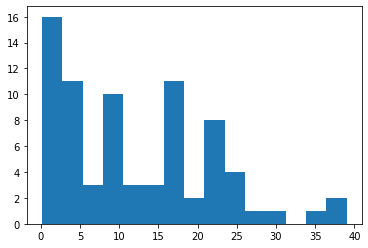

In [73]:
plt.hist(solteiras_com_pais['Idade'], bins = 15)
plt.show()

### Média de mulheres "solteiras"

In [74]:
data.loc[data['Titulo']=='Solteira']['Idade'].mean()

21.774238095238097

### Distribuição das idades de mulheres "solteiras"

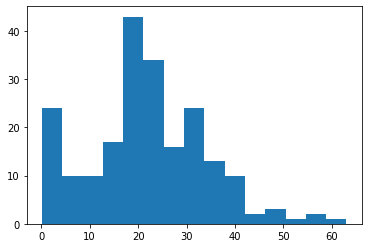

In [75]:
plt.hist(data.loc[data['Titulo']=='Solteira']['Idade'], bins = 15)
plt.show()

### Média de idade de mulheres "casadas"

In [76]:
data.loc[data['Titulo']=='Casada']['Idade'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"

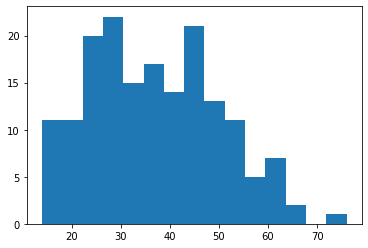

In [77]:
plt.hist(data.loc[data['Titulo']=='Casada']['Idade'], bins = 15)
plt.show()

### Adicionar coluna "solteira com pais"

In [78]:
solteiras_com_pais.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [79]:
data['solteira_com_pais'] = 0

In [80]:
for idx, _ in data.iterrows():
  if idx in solteiras_com_pais.index:
    data['solteira_com_pais'].at[idx] = 1 

In [86]:
data.loc[data['solteira_com_pais']==1]['Idade'].mean() #  solteira com pais

12.178815789473685

In [87]:
data.loc[data['solteira_com_pais']==0]['Idade'].mean() # solteira sem pais

31.26812371134021

### Transformar recursos categóricos em "dummies"

In [89]:
data['Sexo'] = data['Sexo'].map({'homem':0, 'mulher':1})

In [90]:
data.head()

,Idade,Embarque,Tarifa,PaisFilhos,Classe,Sexo,IrmaosConjuge,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,22.0,S,7.2500,0,3,0,1,HomemAdulto,0
2,38.0,C,71.2833,0,1,1,1,Casada,0
3,26.0,S,7.9250,0,3,1,0,Solteira,0
4,35.0,S,53.1000,0,1,1,1,Casada,0
5,35.0,S,8.0500,0,3,0,0,HomemAdulto,0


In [91]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first = True)

In [92]:
data.head()

,Idade,Tarifa,PaisFilhos,Sexo,IrmaosConjuge,solteira_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,,
1,22.0,7.2500,0,0,1,0,0,1,0,1,1,0,0
2,38.0,71.2833,0,1,1,0,0,0,0,0,0,0,0
3,26.0,7.9250,0,1,0,0,0,1,0,1,0,0,1
4,35.0,53.1000,0,1,1,0,0,0,0,1,0,0,0
5,35.0,8.0500,0,0,0,0,0,1,0,1,1,0,0


In [94]:
data.shape

(1309, 13)

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [95]:
data.isnull().sum()

Idade                 263
Tarifa                  0
PaisFilhos              0
Sexo                    0
IrmaosConjuge           0
solteira_com_pais       0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [96]:
train_idade = data.dropna()

In [99]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [100]:
test_idade

,Tarifa,PaisFilhos,Sexo,IrmaosConjuge,solteira_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,
6,8.4583,0,0,0,0,0,1,1,0,1,0,0
18,13.0000,0,0,0,0,1,0,0,1,1,0,0
20,7.2250,0,1,0,0,0,1,0,0,0,0,0
27,7.2250,0,0,0,0,0,1,0,0,1,0,0
29,7.8792,0,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,7.7208,0,1,0,0,0,1,1,0,0,0,1
1302,7.7500,0,1,0,0,0,1,1,0,0,0,1
1305,8.0500,0,0,0,0,0,1,0,1,1,0,0


In [101]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

In [102]:
X = train_idade.drop('Idade', axis=1)

In [103]:
y = train_idade['Idade']

In [104]:
X.shape, y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [105]:
from sklearn import linear_model

### Instanciar modelo

In [106]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [107]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Treinar modelo

In [110]:
X_train.shape, y_train.shape

((732, 12), (732,))

In [111]:
X_test.shape, y_test.shape # valor real

((314, 12), (314,))

In [112]:
lm.fit(X_train, y_train) # aplicando o treino

LinearRegression()

### Fazer predição

In [114]:
pred = lm.predict(X_test) # valores preditivos
pred.shape

(314,)

### Importar mean_squared_error (erro quadrado médio)

In [115]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [117]:
lm.score(X_test, y_test) # quão bem avaliado estão os dados

0.4805876982432217

### Averiguar rmse

In [118]:
mse = mean_squared_error(y_test, pred) # diferencial do dado original pro preditivo

In [119]:
rmse = np.sqrt(mse) # Erro de 10 pra cima ou pra baixo
rmse

10.363417349081407

### Visualizar resíduos em scatterplot

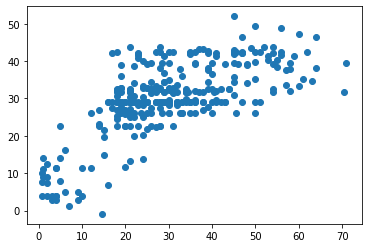

In [120]:
plt.scatter(y_test, pred)
plt.show()

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

In [121]:
test_idade.shape

(263, 12)

In [122]:
pred_idade = lm.predict(test_idade)

In [123]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [124]:
test_idade['Idade'] = pred_idade

In [125]:
test_idade.isnull().sum()

Tarifa                0
PaisFilhos            0
Sexo                  0
IrmaosConjuge         0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

### Averiguar shapes

In [126]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [127]:
idade = pd.concat([train_idade, test_idade], sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [128]:
idade.shape

(1309, 13)

In [129]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})

In [130]:
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,25.163780
1302,1302,25.163531
1305,1305,29.088798


### Salvar CSV com idade completa

In [131]:
idade_completa.to_csv('idade_completa.csv', index=False)

In [132]:
data_idade = pd.read_csv('idade_completa.csv')

In [133]:
data_idade

,IdPassageiro,Idade
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
1304,1300,25.163780
1305,1302,25.163531
1306,1305,29.088798
1307,1308,29.088798
